In [2]:
import requests
import pandas as pd
import bs4
import re
import matplotlib.pyplot as plt
import os
import glob
from datetime import datetime

In [12]:
url1 = "https://www.coingecko.com"
r = requests.get(url1)
soup = bs4.BeautifulSoup(r.text, 'lxml')
table = soup.find('table', {'class':'sort table mb-0 text-sm text-lg-normal table-scrollable'})
allLinks = {}
for link in table.find_all('a', {'class': 'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}, href=True):
    print(link['href'])
    print(link.text)
    allLinks[link.text] = link['href']

for k in allLinks.keys():
    r = requests.get(url1 + allLinks[k])
    soup = bs4.BeautifulSou

/en/coins/bitcoin

Bitcoin

/en/coins/ethereum

Ethereum

/en/coins/tether

Tether

/en/coins/bnb

BNB

/en/coins/usd-coin

USD Coin

/en/coins/xrp

XRP

/en/coins/cardano

Cardano

/en/coins/solana

Solana

/en/coins/terra-luna

Terra

/en/coins/avalanche

Avalanche

/en/coins/polkadot

Polkadot

/en/coins/binance-usd

Binance USD

/en/coins/dogecoin

Dogecoin

/en/coins/shiba-inu

Shiba Inu

/en/coins/terra-usd

TerraUSD

/en/coins/polygon

Polygon

/en/coins/cronos

Cronos

/en/coins/wrapped-bitcoin

Wrapped Bitcoin

/en/coins/dai

Dai

/en/coins/litecoin

Litecoin

/en/coins/cosmos

Cosmos

/en/coins/chainlink

Chainlink

/en/coins/tron

TRON

/en/coins/near

Near

/en/coins/ftx-token

FTX Token

/en/coins/leo-token

LEO Token

/en/coins/bitcoin-cash

Bitcoin Cash

/en/coins/algorand

Algorand

/en/coins/lido-staked-ether

Lido Staked Ether

/en/coins/stellar

Stellar

/en/coins/okb

OKB

/en/coins/hedera

Hedera

/en/coins/fantom

Fantom

/en/coins/uniswap

Uniswap

/en/coins/dece

In [8]:
now = datetime.now()
end_date = now.strftime("%Y-%m-%d")
print(end_date)

url = "https://www.coingecko.com/en/coins/bitcoin/historical_data/usd?start_date=2013-01-02&end_date="+end_date+"#panel"
r = requests.get(url)
soup = bs4.BeautifulSoup(r.text, 'lxml')
table = soup.find('table', {'class':'table table-striped text-sm text-lg-normal'})
body = table.find_all('tr')
head = body[0]
body_rows = body[1:]

headings = []
for item in head.find_all("th"):
    item = (item.text).rstrip('\n')
    headings.append(item)

print(headings)
rows = []
for i in range(len(body_rows)):
    minirow = []
    for date in body_rows[i].find_all('th'):
        cleaned = re.sub("((\xa0)|(\n)|,|$)","",date.text)
        minirow.append(cleaned)
    for item in body_rows[i].find_all('td'):
        cleaned = re.sub("(\xa0)|(\n)|,|$","",item.text)
        minirow.append(cleaned)
    rows.append(minirow)
    
df = pd.DataFrame(data=rows, columns=headings)
df.index = pd.to_datetime(df['Date'])
del df['Date']
df.head()

2022-02-23
['Date', 'Market Cap', 'Volume', 'Open', 'Close']


,Market Cap,Volume,Open,Close
Date,,,,
2022-02-21,$730381814665,$15998424231,$38514,N/A
2022-02-20,$761447243940,$11735183838,$40193,$38514
2022-02-19,$759881874201,$20130002755,$40073,$40193
2022-02-18,$770096677779,$22270664615,$40563,$40073
2022-02-17,$836256083784,$16847003857,$44063,$40563


In [4]:
bitcoin = pd.read_csv("C:\\Qilin\\Python\\CryptoReturnsModelling\\btc-usd-max.csv")
bitcoin.index = pd.to_datetime(bitcoin['snapped_at'])
del bitcoin['snapped_at']
bitcoin['Returns'] = bitcoin['price'].pct_change().cumsum().fillna(0).multiply(100)
bitcoin.head()


,price,market_cap,total_volume,Returns
snapped_at,,,,
2013-04-28 00:00:00+00:00,135.30,1.500518e+09,0.0,0.000000
2013-04-29 00:00:00+00:00,141.96,1.575032e+09,0.0,4.922395
2013-04-30 00:00:00+00:00,135.30,1.501657e+09,0.0,0.230932
2013-05-01 00:00:00+00:00,117.00,1.298952e+09,0.0,-13.294567
2013-05-02 00:00:00+00:00,103.43,1.148668e+09,0.0,-24.892857


Text(0, 0.5, 'Percent Returns')

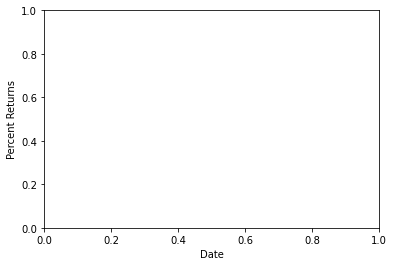

In [5]:
# plt.plot(bitcoin['price'])
plt.xlabel("Date")
plt.ylabel("Percent Returns")
# plt.show()

In [45]:
path = r'C:\Qilin\Python\CryptoReturnsModelling'
all_files = glob.glob(os.path.join(path + "/*.csv"))

coinlist = []
coinlist_names = []

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        rip = filename.split('-')
        coin = rip[0] + '-' + rip[1]
        
        f = os.path.join(path, filename)
        tempdf = pd.read_csv(f)
        tempdf.index = pd.to_datetime(tempdf['snapped_at'])
        tempdf.reindex(bitcoin.index)
        del tempdf['snapped_at']
        del tempdf['market_cap']
        del tempdf['total_volume']
        coinprice = coin + "-price"
        tempdf.rename(columns={"price": coinprice}, inplace=True)
        tempdf[coin + '-returns'] = tempdf[coinprice].pct_change().cumsum().fillna(0).multiply(100)
        coinlist_names.append(coin + '-returns')
        coinlist.append(tempdf)
final_df = pd.concat(coinlist, axis=1)
final_df['avgReturns'] = final_df[coinlist_names].mean(axis=1)
print(final_df)

                           ada-usd-price  ada-usd-returns  avax-usd-price  \
snapped_at                                                                  
2013-04-28 00:00:00+00:00            NaN              NaN             NaN   
2013-04-29 00:00:00+00:00            NaN              NaN             NaN   
2013-04-30 00:00:00+00:00            NaN              NaN             NaN   
2013-05-01 00:00:00+00:00            NaN              NaN             NaN   
2013-05-02 00:00:00+00:00            NaN              NaN             NaN   
...                                  ...              ...             ...   
2022-02-19 00:00:00+00:00       0.998591       768.611170       84.085427   
2022-02-20 00:00:00+00:00       0.999142       768.666288       85.230139   
2022-02-21 00:00:00+00:00       0.934134       762.159925       77.414013   
2022-02-22 00:00:00+00:00       0.860280       754.253776       70.019524   
2022-02-23 00:00:00+00:00       0.891381       757.869011       74.531981   

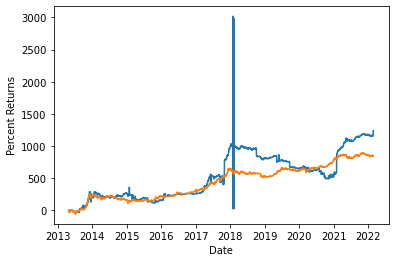

In [46]:
plt.plot(final_df['avgReturns'])
plt.plot(bitcoin['Returns'])
plt.xlabel("Date")
plt.ylabel("Percent Returns")
plt.show()